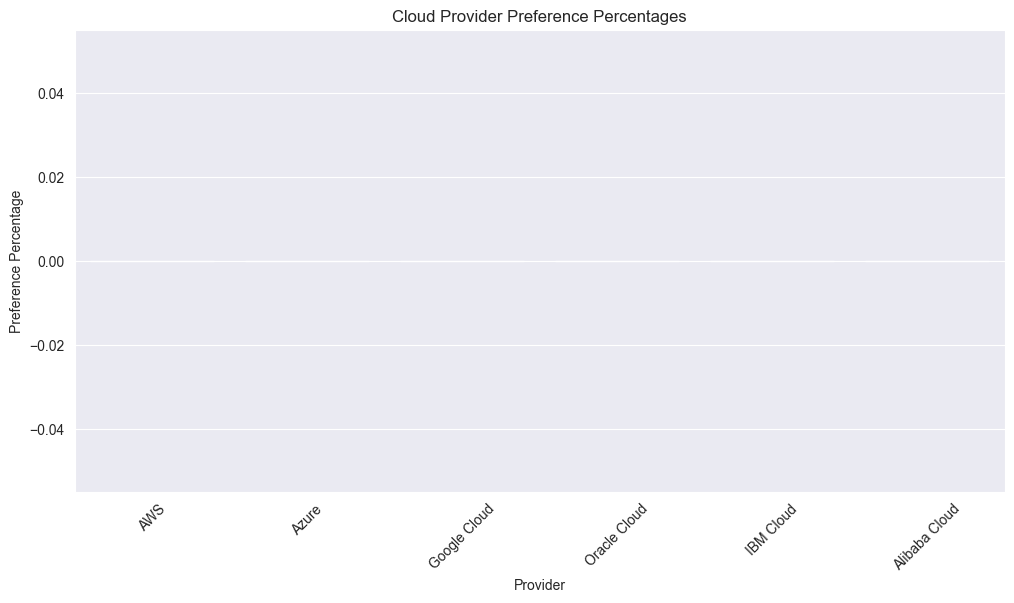

<Figure size 1200x600 with 0 Axes>

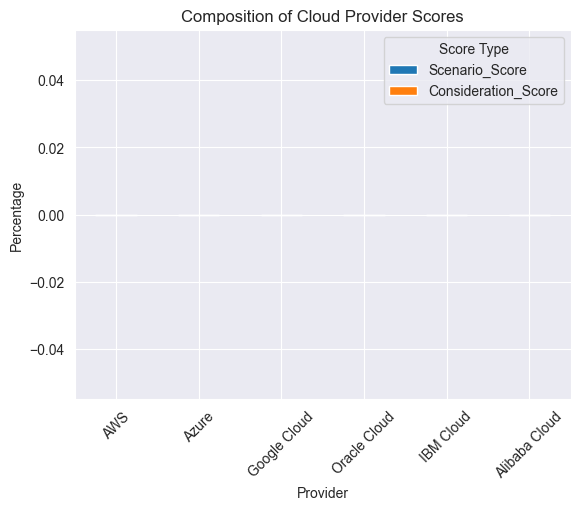

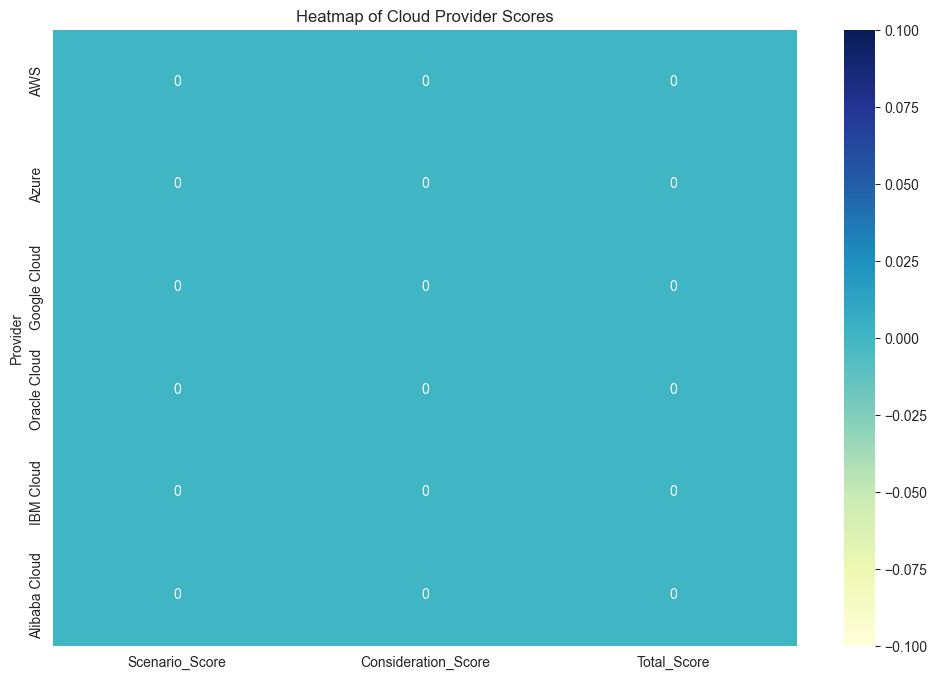

<Figure size 640x480 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from cloudpref_metr import CloudPrefMETR

# Create instance of evaluator 
evaluator = CloudPrefMETR()

# Assuming you have already calculated preference_metrics
preference_metrics = evaluator.calculate_preference_metrics()

# Convert preference_metrics to a DataFrame for easier plotting
df = pd.DataFrame(preference_metrics).T.reset_index()
df.columns = ['Provider', 'Scenario_Score', 'Consideration_Score', 'Total_Score', 'Preference_Percentage']

# 1. Bar plot of Preference Percentages
plt.figure(figsize=(12, 6))
sns.barplot(x='Provider', y='Preference_Percentage', data=df)
plt.title('Cloud Provider Preference Percentages')
plt.ylabel('Preference Percentage')
plt.xticks(rotation=45)
plt.show()

# 2. Stacked bar plot of Scenario and Consideration Scores
plt.figure(figsize=(12, 6))
df_stacked = df[['Provider', 'Scenario_Score', 'Consideration_Score']]
df_stacked_pct = df_stacked.set_index('Provider')
df_stacked_pct = df_stacked_pct.div(df_stacked_pct.sum(axis=1), axis=0) * 100
df_stacked_pct.plot(kind='bar', stacked=True)
plt.title('Composition of Cloud Provider Scores')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Score Type')
plt.show()

# 3. Heatmap of raw scores
plt.figure(figsize=(12, 8))
heatmap_data = df.set_index('Provider')[['Scenario_Score', 'Consideration_Score', 'Total_Score']]
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Heatmap of Cloud Provider Scores')
plt.show()

# 4. Radar chart of Preference Percentages
def make_spider(df, row, title):
    categories = list(df)[1:]
    N = len(categories)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    
    ax = plt.subplot(111, polar=True)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories)
    ax.set_rlabel_position(0)
    plt.yticks([20,40,60,80,100], ["20","40","60","80","100"], color="grey", size=7)
    plt.ylim(0,100)
    
    values = df.loc[row].drop('Provider').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(title, size=11, y=1.1)

# plt.figure(figsize=(15, 15))
# for i, provider in enumerate(df['Provider']):
#     plt.subplot(3, 2, i+1, polar=True)
#     make_spider(df[['Provider', 'Preference_Percentage']], i, provider)

plt.tight_layout()
plt.show()

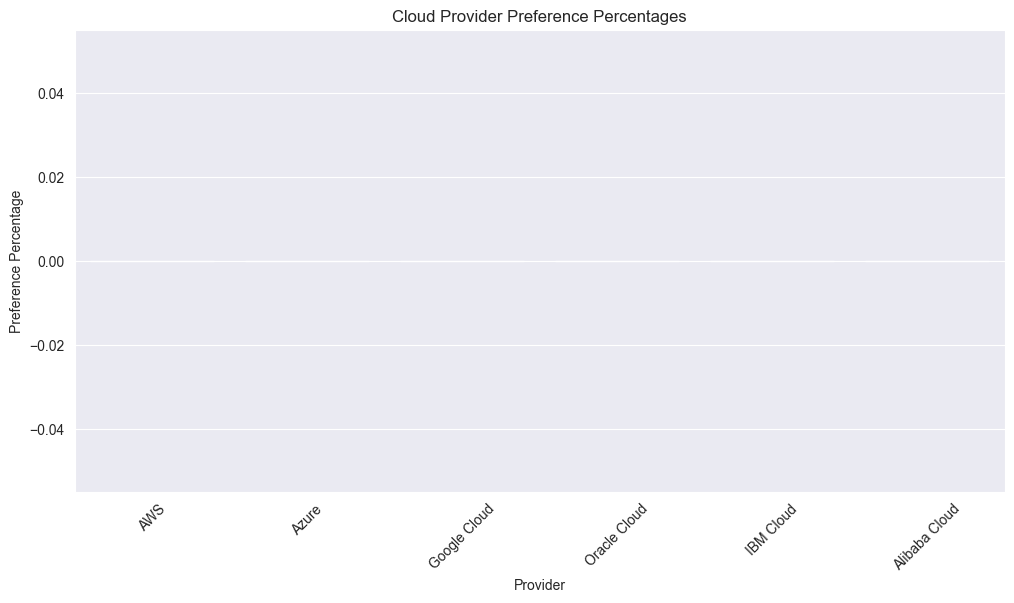

<Figure size 1200x600 with 0 Axes>

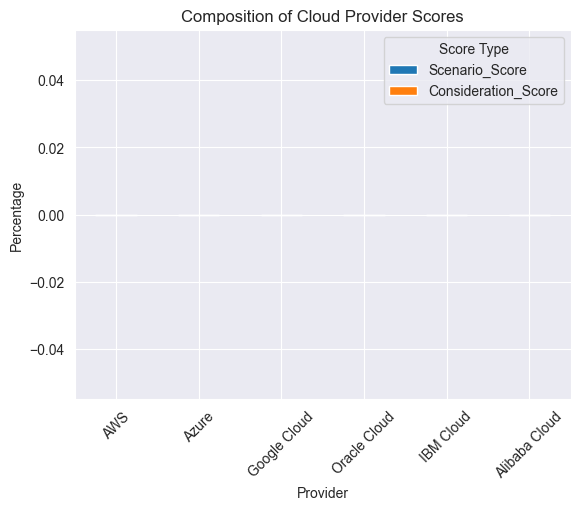

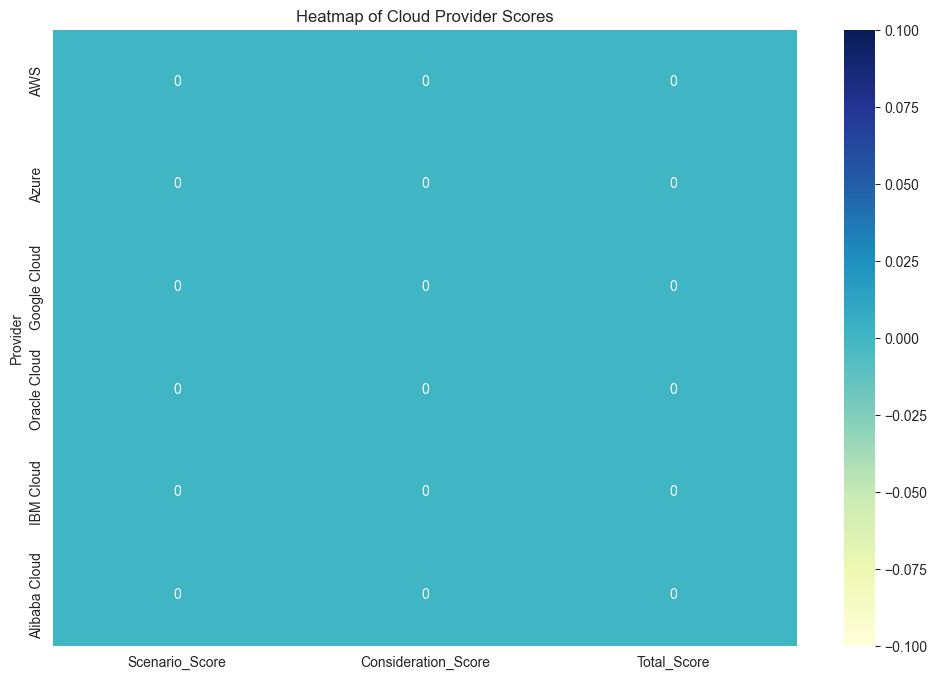

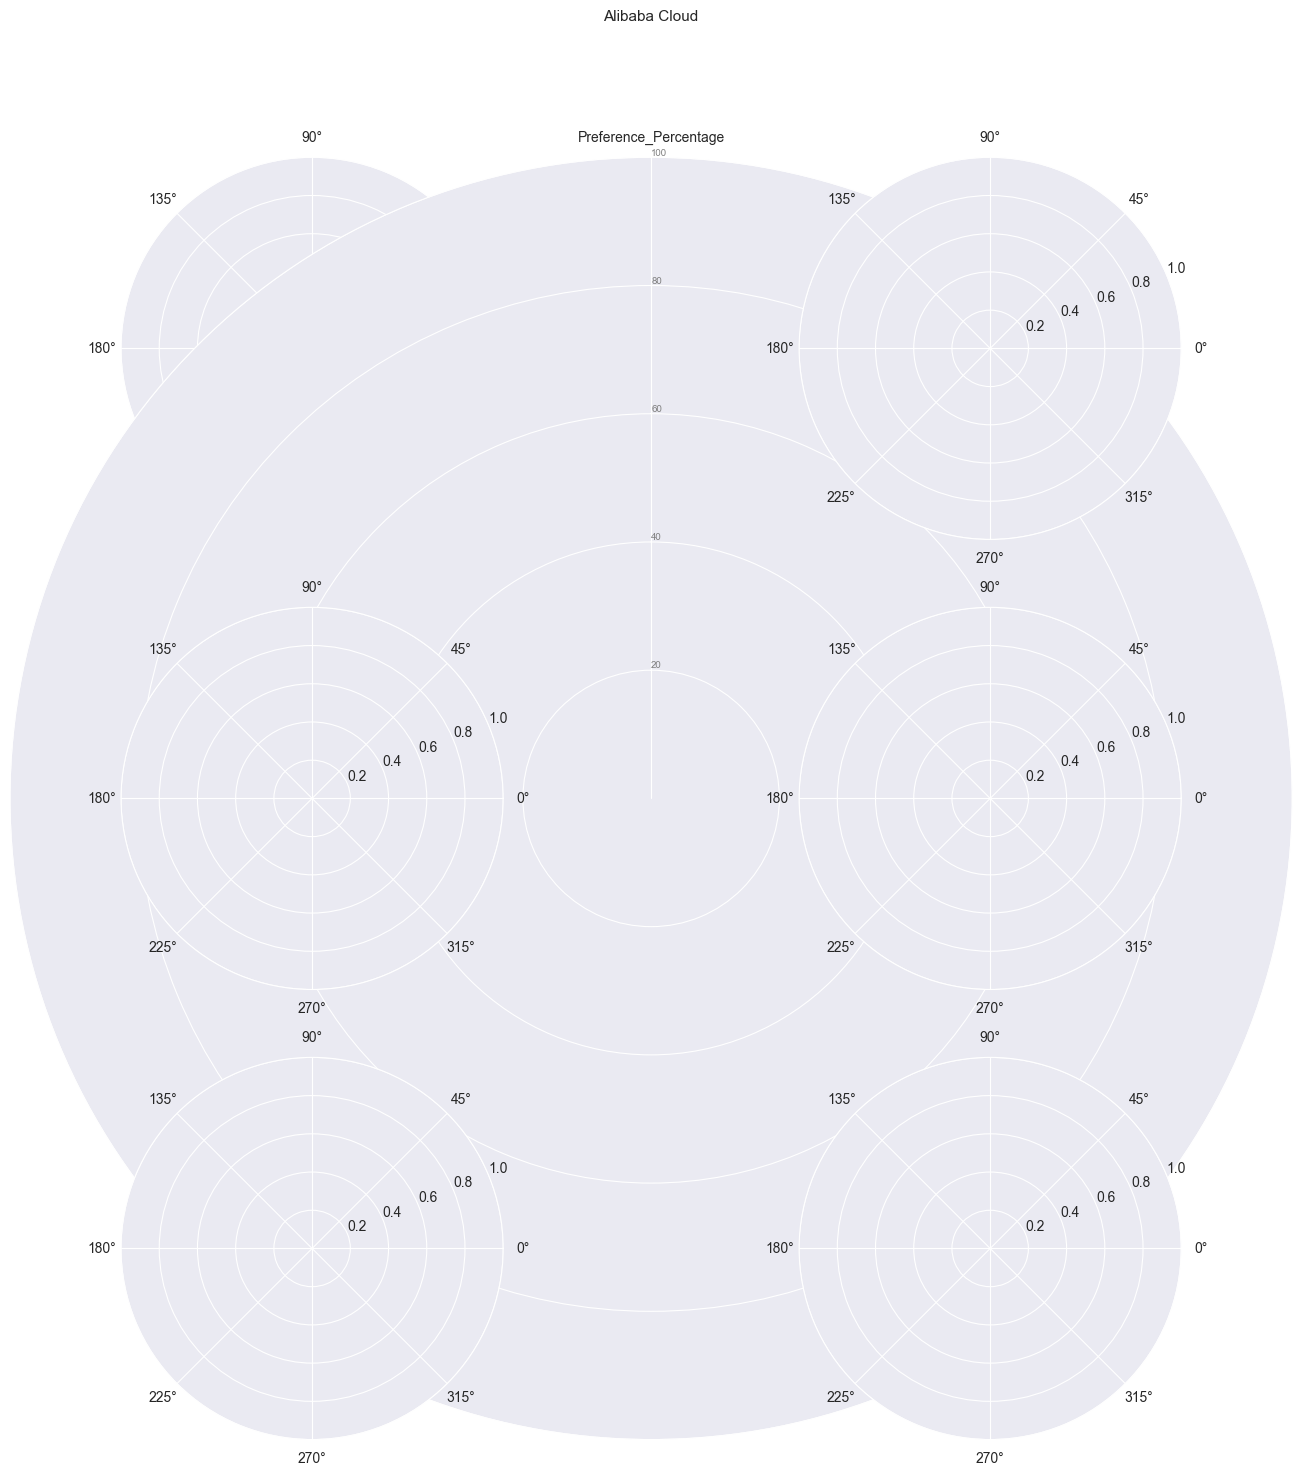

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from cloudpref_metr import CloudPrefMETR

# Create instance of evaluator 
evaluator = CloudPrefMETR()

# Ensure preference_metrics is not empty
if not preference_metrics:
    print("No preference metrics available. Make sure evaluations have been run.")
else:
    # Convert preference_metrics to a DataFrame for easier plotting
    df = pd.DataFrame(preference_metrics).T.reset_index()
    df.columns = ['Provider', 'Scenario_Score', 'Consideration_Score', 'Total_Score', 'Preference_Percentage']

    # 1. Bar plot of Preference Percentages
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Provider', y='Preference_Percentage', data=df)
    plt.title('Cloud Provider Preference Percentages')
    plt.ylabel('Preference Percentage')
    plt.xticks(rotation=45)
    plt.show()

    # 2. Stacked bar plot of Scenario and Consideration Scores
    plt.figure(figsize=(12, 6))
    df_stacked = df[['Provider', 'Scenario_Score', 'Consideration_Score']]
    df_stacked_pct = df_stacked.set_index('Provider')
    df_stacked_pct = df_stacked_pct.div(df_stacked_pct.sum(axis=1), axis=0) * 100
    df_stacked_pct.plot(kind='bar', stacked=True)
    plt.title('Composition of Cloud Provider Scores')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.legend(title='Score Type')
    plt.show()

    # 3. Heatmap of raw scores
    plt.figure(figsize=(12, 8))
    heatmap_data = df.set_index('Provider')[['Scenario_Score', 'Consideration_Score', 'Total_Score']]
    sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g')
    plt.title('Heatmap of Cloud Provider Scores')
    plt.show()

    # 4. Radar chart of Preference Percentages
    def make_spider(df, row, title):
        categories = list(df)[1:]
        N = len(categories)
        angles = [n / float(N) * 2 * np.pi for n in range(N)]
        angles += angles[:1]
        
        ax = plt.subplot(111, polar=True)
        ax.set_theta_offset(np.pi / 2)
        ax.set_theta_direction(-1)
        plt.xticks(angles[:-1], categories)
        ax.set_rlabel_position(0)
        plt.yticks([20,40,60,80,100], ["20","40","60","80","100"], color="grey", size=7)
        plt.ylim(0,100)
        
        values = df.loc[row].drop('Provider').values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid')
        ax.fill(angles, values, 'b', alpha=0.1)
        
        plt.title(title, size=11, y=1.1)

    plt.figure(figsize=(15, 15))
    for i, provider in enumerate(df['Provider']):
        plt.subplot(3, 2, i+1, polar=True)
        make_spider(df[['Provider', 'Preference_Percentage']], i, provider)

    plt.tight_layout()
    plt.show()